In [125]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [126]:
crime = pd.read_csv('data/crime.csv', low_memory=False)
pop = pd.read_csv('data/total-population.csv', low_memory=False)
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")


Importing and loading necessary packages and files.

In [127]:
len(crime)

276271

Showing the representation of the total number of crimes committed in Pittsburgh

In [128]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

Mt. Oliver Boro                40
Ridgemont                      69
Outside County                 83
St. Clair                      89
East Carnegie                 109
                             ... 
Brookline                    2614
East Liberty                 2752
Carrick                      3636
South Side Flats             4904
Central Business District    6808
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

Showing the representation of the total number of crimes per neighborhood sorted ascending

In [129]:
total_crime_df = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().to_frame()
total_crime_df.sort_values(by='HIERARCHY', ascending=True) #Sort by hierarchy

,HIERARCHY
INCIDENTNEIGHBORHOOD,
Mt. Oliver Boro,1766.0
Ridgemont,3843.0
St. Clair,4547.0
New Homestead,4555.0
Regent Square,4983.0
...,...
Mount Washington,117671.0
Brookline,123946.0
Carrick,154705.0


Show the hierarchy of the crimes, which is the code assigned to each crime. 99 is NA and 1 is murder. 

In [130]:
crime["HIERARCHY"] = crime["HIERARCHY"].apply(lambda x: abs(100-x)) # Swap the scores so lower is now higher


We're gonna need to swap these numbers so that murder is 99 and NA is 1.

In [131]:
total_crime_df["NEW HIERARCHY"] = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().to_frame()
total_crime_df.sort_values(by='NEW HIERARCHY', ascending=True)

,HIERARCHY,NEW HIERARCHY
INCIDENTNEIGHBORHOOD,,
Mt. Oliver Boro,1766.0,2234.0
Outside County,5915.0,2385.0
Ridgemont,3843.0,3057.0
Outside State,8254.0,3346.0
St. Clair,4547.0,4353.0
...,...,...
Shadyside,104563.0,141037.0
East Liberty,107576.0,167624.0
Carrick,154705.0,208895.0


This is the fixed values that properly reflect severity of crime.

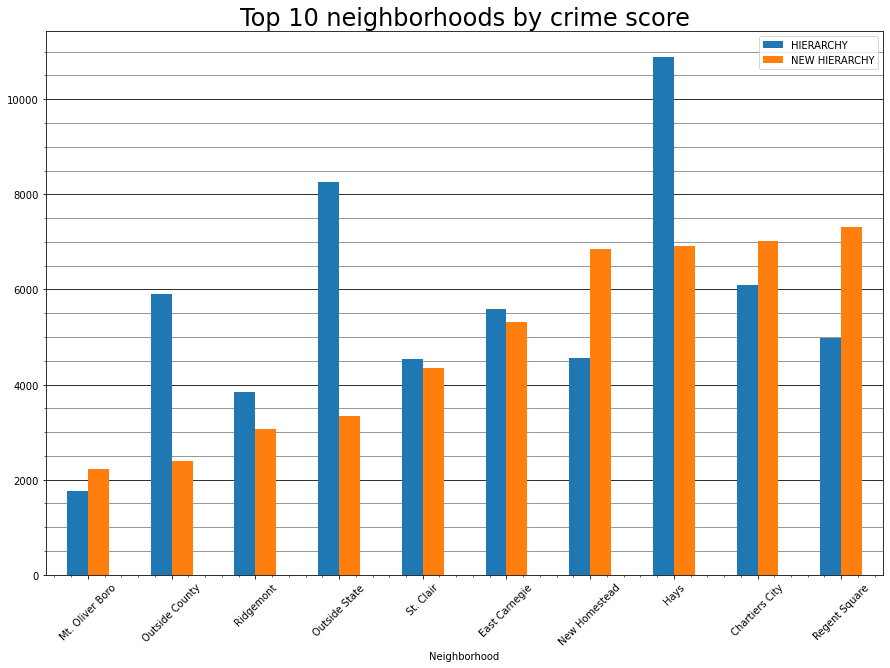

In [132]:
ax1 = total_crime_df.nsmallest(10, columns="NEW HIERARCHY").sort_values(by='NEW HIERARCHY', ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a graph of the top 10 neighborhoods by the crime score we calculated earlier. The reasoning is that murder is a severe crime and should be counted as more crime than NA which is pretty much when no crime occurs and should not really affect crime levels in a certain neighborhood. The blue is the old data and the orange is the processed data

In [133]:
crime_map = neighborhoods.merge(total_crime_df, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

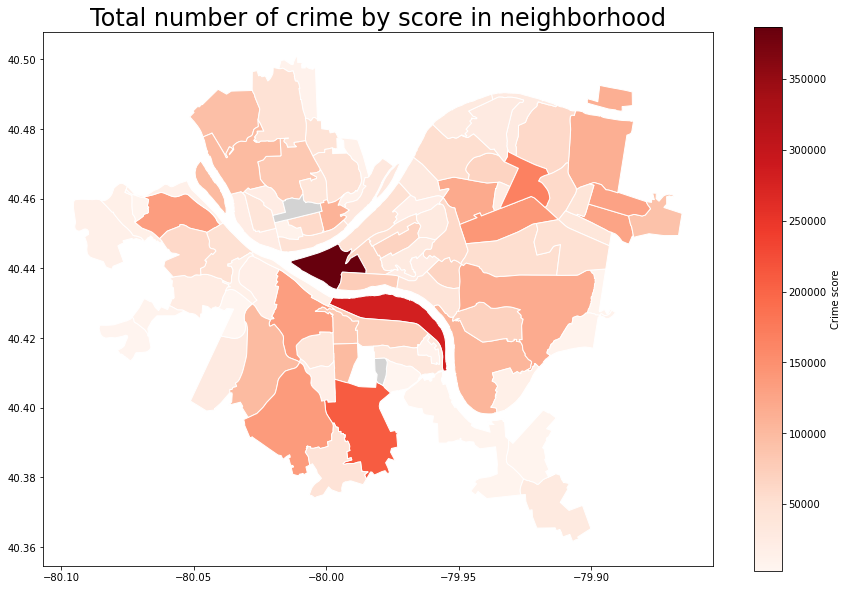

In [134]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='NEW HIERARCHY',
                cmap='Reds',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total number of crime by score in neighborhood', fontdict = {'fontsize': 24})
plt.show()


Here is a map of the neighborhoods where darkest red has the largest modified crime score.

In [135]:
pop_df = pop.groupby(['Neighborhood'])['Estimate; Total'].sum().to_frame()
pop_df.sort_values(by='Estimate; Total', ascending=True)


,Estimate; Total
Neighborhood,
Chateau,3.0
South Shore,12.0
North Shore,205.0
West End,235.0
St. Clair,270.0
...,...
Carrick,10122.0
Squirrel Hill North,11336.0
Brookline,13160.0


Considering that large cities are sure to have more crime due to statistics, I thought it would be fair to include population so I could calculate modified crime score per capita

In [136]:
total_crime_df["POPULATION"] = pop_df['Estimate; Total']
total_crime_df["POPULATION"] = total_crime_df["POPULATION"].fillna(50)
total_crime_df.sort_values(by='POPULATION', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION
INCIDENTNEIGHBORHOOD,,,
Chateau,75501.0,22599.0,3.0
South Shore,21995.0,15705.0,12.0
Outside State,8254.0,3346.0,50.0
Outside City,36929.0,11771.0,50.0
Mt. Oliver Boro,1766.0,2234.0,50.0
...,...,...,...
Carrick,154705.0,208895.0,10122.0
Squirrel Hill North,56570.0,53430.0,11336.0
Brookline,123946.0,137454.0,13160.0


In [137]:
total_crime_df["NEW HIERARCHY / POPULATION"] = total_crime_df["NEW HIERARCHY"] / total_crime_df["POPULATION"]
total_crime_df.sort_values(by='NEW HIERARCHY / POPULATION', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION,NEW HIERARCHY / POPULATION
INCIDENTNEIGHBORHOOD,,,,
Squirrel Hill North,56570.0,53430.0,11336.0,4.713303
Stanton Heights,26371.0,28429.0,4761.0,5.971225
North Oakland,57037.0,58863.0,9602.0,6.130285
Swisshelm Park,6808.0,8792.0,1345.0,6.536803
New Homestead,4555.0,6845.0,973.0,7.034943
...,...,...,...,...
North Shore,37746.0,47554.0,205.0,231.970732
Outside City,36929.0,11771.0,50.0,235.420000
Central North Side,45926.0,63574.0,50.0,1271.480000


Get the population of the people so that we can get crime score per capita instead of total crime score

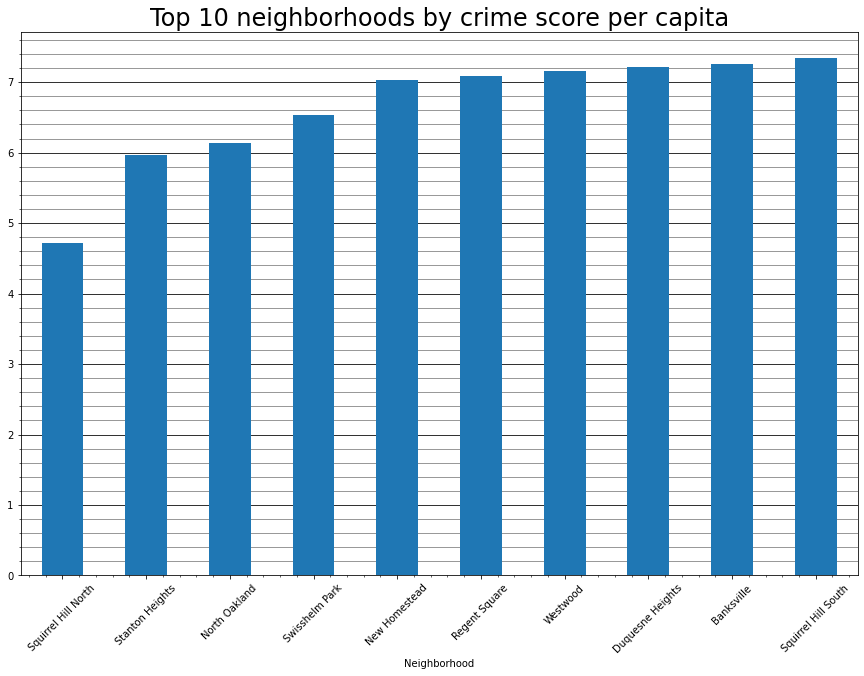

In [138]:
ax3 = total_crime_df["NEW HIERARCHY / POPULATION"].nsmallest(10).plot(kind="bar", figsize=(15,10))
ax3.set_xlabel("Neighborhood")
ax3.set_axisbelow(True)
ax3.yaxis.grid(True, color ="black")
ax3.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score per capita', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

In [139]:
total_crime_df["log(NEW HIERARCHY / POPULATION)"] = np.log(total_crime_df["NEW HIERARCHY / POPULATION"])
total_crime_df.sort_values(by='log(NEW HIERARCHY / POPULATION)', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION,NEW HIERARCHY / POPULATION,log(NEW HIERARCHY / POPULATION)
INCIDENTNEIGHBORHOOD,,,,,
Squirrel Hill North,56570.0,53430.0,11336.0,4.713303,1.550389
Stanton Heights,26371.0,28429.0,4761.0,5.971225,1.786952
North Oakland,57037.0,58863.0,9602.0,6.130285,1.813241
Swisshelm Park,6808.0,8792.0,1345.0,6.536803,1.877448
New Homestead,4555.0,6845.0,973.0,7.034943,1.950890
...,...,...,...,...,...
North Shore,37746.0,47554.0,205.0,231.970732,5.446611
Outside City,36929.0,11771.0,50.0,235.420000,5.461371
Central North Side,45926.0,63574.0,50.0,1271.480000,7.147937


Seeing as the crime per capita in Chateau is over 7000, the plot maps only reflected that Chateau was #1 and the other neighborhoods were all the same. That is why I'm adding a log column because then it will allow all neighborhoods to be accurately compared.

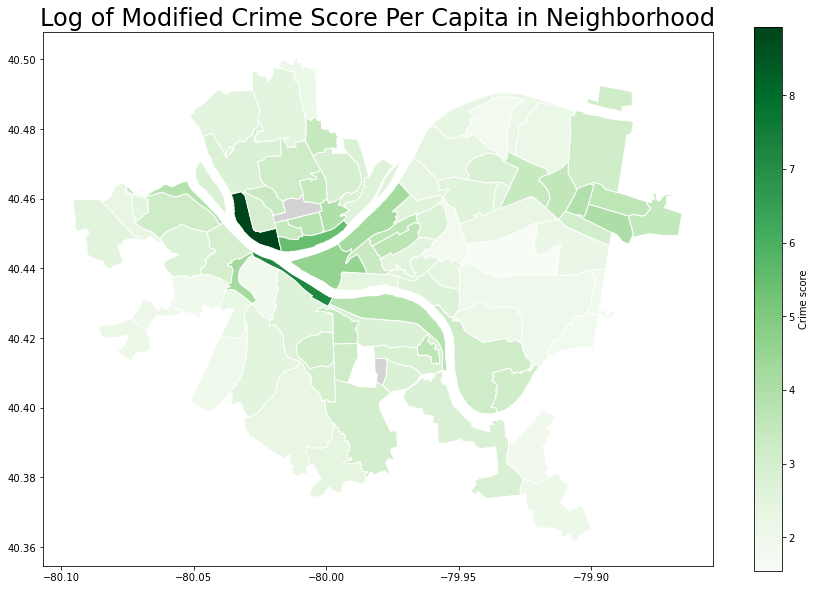

In [140]:
crime_map = neighborhoods.merge(total_crime_df, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='log(NEW HIERARCHY / POPULATION)',
                cmap='Greens',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Log of Modified Crime Score Per Capita in Neighborhood', fontdict = {'fontsize': 24})
plt.show()

Here is the map showing the log of the quotient of the modified crime score and total capita in neighborhood. The data shows a clear concentration of crime towards the center of Pittsburgh where the large spits and where the point is located. The safest neighborhoods are very far away from the middle. Therefore it is not surprising that many of the top winners were areas 20-30 minutes away from the center of downtown.

Conclusion: The best neighborhood is Squirrel Hill North because it has the least crime per capita.